In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

MIN_NUM = 0
MAX_NUM = 4095

print("Quantum implementation of Bernstein–Vazirani algorithm for guessing game.")

Quantum implementation of Bernstein–Vazirani algorithm for guessing game.


In [2]:
print("Randomly picking a secret number between %d and %d...  " %(MIN_NUM, MAX_NUM))
# Generate a random integer
secret = random.randint(MIN_NUM, MAX_NUM)

print("(Secret number chosen is %d)" %(secret))

Randomly picking a secret number between 0 and 4095...  
(Secret number chosen is 186)


In [3]:
secret_as_binary = format(secret, "b")
search_space_size = MAX_NUM.bit_length()
print("Size of search space is %d bits." %(search_space_size))

Size of search space is 12 bits.


In [4]:
# Pad secret with leading 0 as needed to ensure it has the same number of bit indices as the search space 
delta = search_space_size - len(secret_as_binary)
secret_as_binary = ("0" * delta) + secret_as_binary

In [5]:
# https://qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html

# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(search_space_size+1, search_space_size)

# put auxiliary in state |->
bv_circuit.h(search_space_size)
bv_circuit.z(search_space_size)

# Apply Hadamard gates before querying the oracle
for i in range(search_space_size):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# reverse secret to fit qiskit's least significant bit (LSB) first ordering
lsb_first_secret = secret_as_binary[::-1]

# Apply the inner-product oracle
for q in range(search_space_size):
    if lsb_first_secret[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, search_space_size)
        
# Apply barrier 
bv_circuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(search_space_size):
    bv_circuit.h(i)

# Measurement
for i in range(search_space_size):
    bv_circuit.measure(i, i)

bv_circuit.draw()

┌───┐      ░ ┌───┐                          ░ ┌───┐┌─┐                  »
 q_0: ┤ H ├──────░─┤ I ├──────────────────────────░─┤ H ├┤M├──────────────────»
      ├───┤      ░ └───┘                          ░ ├───┤└╥┘┌─┐               »
 q_1: ┤ H ├──────░───■────────────────────────────░─┤ H ├─╫─┤M├───────────────»
      ├───┤      ░   │  ┌───┐                     ░ ├───┤ ║ └╥┘┌─┐            »
 q_2: ┤ H ├──────░───┼──┤ I ├─────────────────────░─┤ H ├─╫──╫─┤M├────────────»
      ├───┤      ░   │  └───┘                     ░ ├───┤ ║  ║ └╥┘┌─┐         »
 q_3: ┤ H ├──────░───┼─────────■──────────────────░─┤ H ├─╫──╫──╫─┤M├─────────»
      ├───┤      ░   │         │                  ░ ├───┤ ║  ║  ║ └╥┘┌─┐      »
 q_4: ┤ H ├──────░───┼─────────┼────■─────────────░─┤ H ├─╫──╫──╫──╫─┤M├──────»
      ├───┤      ░   │         │    │             ░ ├───┤ ║  ║  ║  ║ └╥┘┌─┐   »
 q_5: ┤ H ├──────░───┼─────────┼────┼────■────────░─┤ H ├─╫──╫──╫──╫──╫─┤M├───»
      ├───┤      ░   │  ┌───┐  │    │    │        ░ ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐»
 q_6: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────────░─┤ H ├─╫──╫──╫──╫──╫──╫─┤M├»
      ├───┤      ░   │  └───┘  │    │    │        ░ ├───┤ ║  ║  ║  ║  ║  ║ └╥┘»
 q_7: ┤ H ├──────░───┼─────────┼────┼────┼────■───░─┤ H ├─╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │  ┌───┐  │    │    │    │   ░ ├───┤ ║  ║  ║  ║  ║  ║  ║ »
 q_8: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────┼───░─┤ H ├─╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │  ├───┤  │    │    │    │   ░ ├───┤ ║  ║  ║  ║  ║  ║  ║ »
 q_9: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────┼───░─┤ H ├─╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │  ├───┤  │    │    │    │   ░ ├───┤ ║  ║  ║  ║  ║  ║  ║ »
q_10: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────┼───░─┤ H ├─╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │  ├───┤  │    │    │    │   ░ ├───┤ ║  ║  ║  ║  ║  ║  ║ »
q_11: ┤ H ├──────░───┼──┤ I ├──┼────┼────┼────┼───░─┤ H ├─╫──╫──╫──╫──╫──╫──╫─»
      ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║  ║  ║  ║  ║ »
q_12: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫──╫──╫──╫─»
      └───┘└───┘ ░ └───┘     └───┘└───┘└───┘└───┘ ░       ║  ║  ║  ║  ║  ║  ║ »
c: 12/════════════════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩═»
                                                          0  1  2  3  4  5  6 »
«                     
« q_0: ───────────────
«                     
« q_1: ───────────────
«                     
« q_2: ───────────────
«                     
« q_3: ───────────────
«                     
« q_4: ───────────────
«                     
« q_5: ───────────────
«                     
« q_6: ───────────────
«      ┌─┐            
« q_7: ┤M├────────────
«      └╥┘┌─┐         
« q_8: ─╫─┤M├─────────
«       ║ └╥┘┌─┐      
« q_9: ─╫──╫─┤M├──────
«       ║  ║ └╥┘┌─┐   
«q_10: ─╫──╫──╫─┤M├───
«       ║  ║  ║ └╥┘┌─┐
«q_11: ─╫──╫──╫──╫─┤M├
«       ║  ║  ║  ║ └╥┘
«q_12: ─╫──╫──╫──╫──╫─
«       ║  ║  ║  ║  ║ 
«c: 12/═╩══╩══╩══╩══╩═
«       7  8  9  10 11

{'000010111010': 1024}


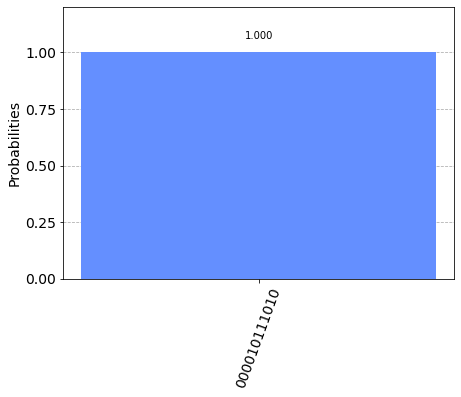

In [6]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

print(answer)
plot_histogram(answer)